In [14]:
from ase import Atoms
from ase.build import bulk
from ase.visualize import view
from gpaw import GPAW, PW
import numpy as np
import matplotlib.pyplot as plt



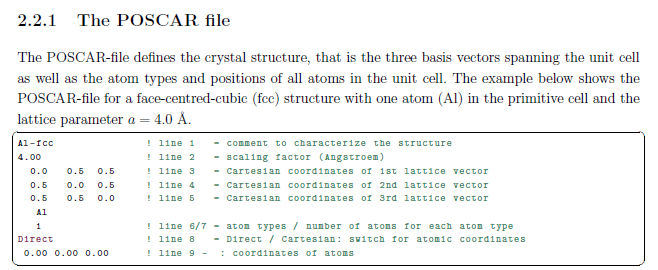

In [6]:
# Define the lattice parameter for FCC Aluminum
a = 4.0  # Angstrom
b = a / 2

name = 'Al-fcc'

# Create the primitive cell of FCC Aluminum
al = Atoms('Al',
             cell=[[0, b, b],
                   [b, 0, b],
                   [b, b, 0]],
             pbc=True)

#view(al)



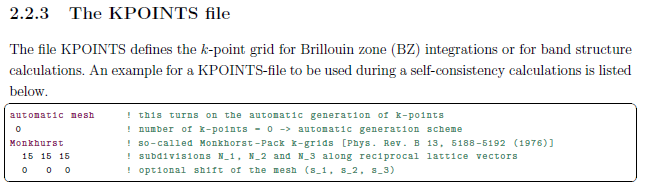
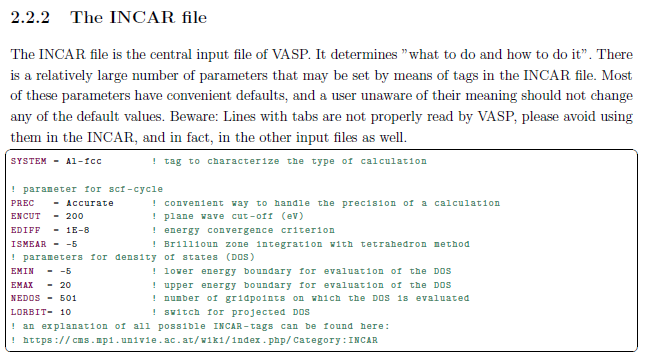

In [7]:
k = 15
calc = GPAW(mode=PW(200),       # cutoff
            convergence={'energy': 1e-8},
            kpts={'size': (k,k,k)} ,     # k-points
            #xc='PBE',
            txt=name + '.txt')  # output file

al.calc = calc

energy = al.get_potential_energy()
calc.write(name + '.gpw')
print('Energy:', energy, 'eV')

Energy: -4.1791048513781925 eV


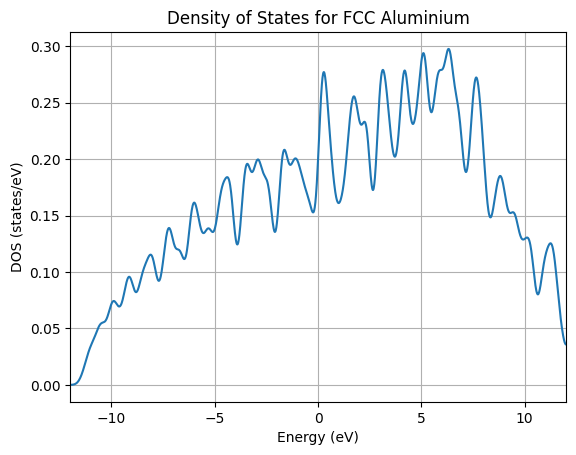

<Figure size 640x480 with 0 Axes>

In [10]:
energies, dos = calc.get_dos(spin=0, npts=2001, width=0.3)  # get DOS
e_f = calc.get_fermi_level()
plt.plot(energies - e_f, dos)
plt.xlabel('Energy (eV)')
plt.ylabel('DOS (states/eV)')
plt.title('Density of States for FCC Aluminium')
plt.grid(True)
plt.xlim([-12, 12])
plt.show()
plt.savefig('ex01.png')
#plt.show()

### Change the lattice parameter

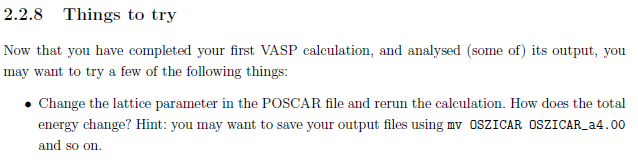

In [15]:
# Define the lattice parameter for FCC Aluminum
for i in np.linspace(3.9,4.3,5):
    a = i  # Angstrom
    b = a / 2

    name = 'Al-fcc'

    # Create the primitive cell of FCC Aluminum
    al = Atoms('Al',
                cell=[[0, b, b],
                    [b, 0, b],
                    [b, b, 0]],
                pbc=True)
    
    k = 15
    calc = GPAW(mode=PW(200),       # cutoff
                convergence={'energy': 1e-8},
                kpts={'size': (k,k,k)} ,     # k-points
                #xc='PBE',
                txt='tmp.txt')  # output file

    al.calc = calc

    energy = al.get_potential_energy()
    print("Lattice parameter a = " + str(a))
    print('The Energy is :', round(energy, 3), 'eV')
    print("\n ########## \n")

Lattice parameter a = 3.9
The Energy is : -4.157 eV

 ########## 

Lattice parameter a = 4.0
The Energy is : -4.175 eV

 ########## 

Lattice parameter a = 4.1
The Energy is : -4.147 eV

 ########## 

Lattice parameter a = 4.2
The Energy is : -4.086 eV

 ########## 

Lattice parameter a = 4.3
The Energy is : -4.001 eV

 ########## 



### Plot DOS for different lattice parameter

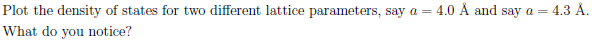

In DFT simulations, the DOS provides information about the number of electronic states at each energy level that are available to be occupied by electrons. <br>
The lattice parameter, which describes the periodicity and spacing of the atoms in the crystal lattice, directly influences the electronic structure of the material.<br>
Overall, the DOS is a direct consequence of the electronic band structure, which is linked to the atomic arrangement.<br>

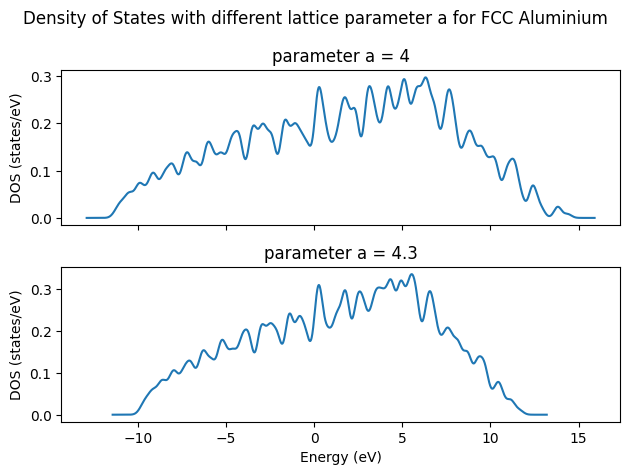

In [12]:
A = [4,4.3]
# Create subplots
fig, axs = plt.subplots(2,1, sharex=True)

for iter in range(len(A)):
    a = A[iter]
    b = a / 2

    name = 'Al-fcc'

    # Create the primitive cell of FCC Aluminum
    al = Atoms('Al',
                cell=[[0, b, b],
                    [b, 0, b],
                    [b, b, 0]],
                pbc=True)
    
    k = 15
    calc = GPAW(mode=PW(200),       # cutoff
                convergence={'energy': 1e-8},
                kpts={'size': (k,k,k)} ,     # k-points
                #xc='PBE',
                txt='tmp.txt')  # output file

    al.calc = calc

    energy = al.get_potential_energy()
    energies, dos = calc.get_dos(spin=0, npts=2001, width=0.3)  # get DOS
    e_f = calc.get_fermi_level()

    axs[iter].plot(energies - e_f, dos)
    axs[iter].set_title('parameter a = ' + str(a))
    axs[iter].set_ylabel('DOS (states/eV)')

axs[iter].set_xlabel('Energy (eV)')
plt.suptitle('Density of States with different lattice parameter a for FCC Aluminium')
plt.tight_layout()
plt.show()
        

### DOS for different k-grid 

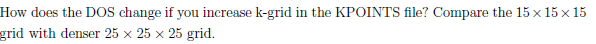

In DFT simulations, the DOS is calculated by summing contributions from electronic states at various points in the Brillouin zone.<br>
In essence, increasing the number of 𝑘-points leads to a more accurate and smooth representation of the DOS by improving the sampling of the electronic structure across the Brillouin zone.<br>
Which is providing a better resolution of the material's electronic properties.<br>

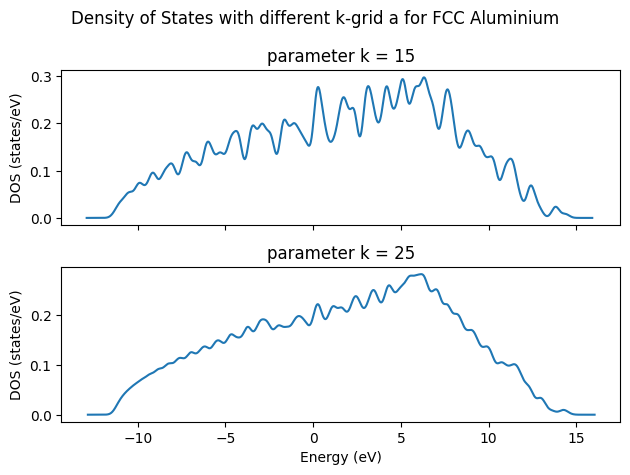

In [ ]:
K = [15,25]
# Create subplots
fig, axs = plt.subplots(2,1, sharex=True)

for iter in range(len(K)):
    a = 4
    b = a / 2

    name = 'Al-fcc'

    # Create the primitive cell of FCC Aluminum
    al = Atoms('Al',
                cell=[[0, b, b],
                    [b, 0, b],
                    [b, b, 0]],
                pbc=True)
    
    k = K[iter]
    calc = GPAW(mode=PW(200),       # cutoff
                convergence={'energy': 1e-8},
                kpts={'size': (k,k,k)} ,     # k-points
                #xc='PBE',
                txt='tmp.txt')  # output file

    al.calc = calc

    energy = al.get_potential_energy()
    energies, dos = calc.get_dos(spin=0, npts=2001, width=0.3)  # get DOS
    e_f = calc.get_fermi_level()

    axs[iter].plot(energies - e_f, dos)
    axs[iter].set_title('parameter k = ' + str(k))
    axs[iter].set_ylabel('DOS (states/eV)')

axs[iter].set_xlabel('Energy (eV)')
plt.suptitle('Density of States with different k-grid a for FCC Aluminium')
plt.tight_layout()
plt.show()